In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import nltk
import torch
import warnings

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress bar tracker for loops

plt.style.use('ggplot')

sia = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
student_file_path_fall_21 = '/kaggle/input/sec-student-correct/Fall_2021_Student_Feedback_Responses.xlsx'
student_file_path_fall_22 = '/kaggle/input/sec-student-correct/Fall_2022_Student_Feedback_Responses.xlsx'
student_file_path_fall_23 = '/kaggle/input/sec-student-correct/Fall_2023_Student_Feedback_In_Person_Career_Fair_Responses.xlsx'
student_file_path_spring_23 = '/kaggle/input/sec-student-correct/Spring_2023_Student_Feedback_Responses.xlsx'

student_fall_21 = pd.read_excel(student_file_path_fall_21)
student_fall_22 = pd.read_excel(student_file_path_fall_22)
student_fall_23 = pd.read_excel(student_file_path_fall_23)
student_spring_23 = pd.read_excel(student_file_path_spring_23)

## Initial Investigation ##

In [4]:
student_fall_21.shape

(136, 22)

In [5]:
student_fall_23.rename(columns={'feedback_in_person\n\n(We cannot bring back the upstairs of the Hall of Champions due to construction).': 'feedback_in_person'}, inplace=True)
student_fall_21.rename(columns = { 'did_not_work_well' : 'feedback_what_did_not_work', 'worked_well' : 'feedback_what_worked'}, inplace = True)
student_fall_23.rename(columns = {'feedback_in_person\n\nfeedback_in_person': 'feedback_in_person'}, inplace = True)

In [6]:
print("Columns for student_fall_21:")
print(student_fall_21.columns)
print()

print("Columns for student_fall_22:")
print(student_fall_22.columns)
print()

print("Columns for student_fall_23:")
print(student_fall_23.columns)
print()

print("Columns for student_spring_23:")
print(student_spring_23.columns)

Columns for student_fall_21:
Index(['id', 'major', 'classification', 'attend_company_showcase',
       'rate_company_showcase', 'feedback_company_showcase',
       'where_found_info', 'use_any_website_resources', 'any_dislike_comm',
       'rate_whether_info_sent_timely', 'rate_documentation',
       'feedback_documentation', 'date', 'overall_rating',
       'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_career_fair', 'rate_career_virtual_platform',
       'issues_career_virtual_platform',
       'favorite_features_career_virtual_platform',
       'future_features_career_virtual_platform', 'other_comm'],
      dtype='object')

Columns for student_fall_22:
Index(['id', 'attend_in_person_fair', 'companies_researched_before_fair',
       'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_improve_fair', 'attend_virtual_fair',
       'rate_virtual_career_fair', 'favorite_features_virtual_app',
       'issues_virtual_career_app', 

In [7]:
dfs = [student_fall_21, student_fall_22, student_fall_23, student_spring_23]
titles = ['Fall 2021', 'Fall 2022', 'Fall 2023', 'Spring 2023']
suffixes = ['fall_21', 'fall_22', 'fall_23', 'spring_23']

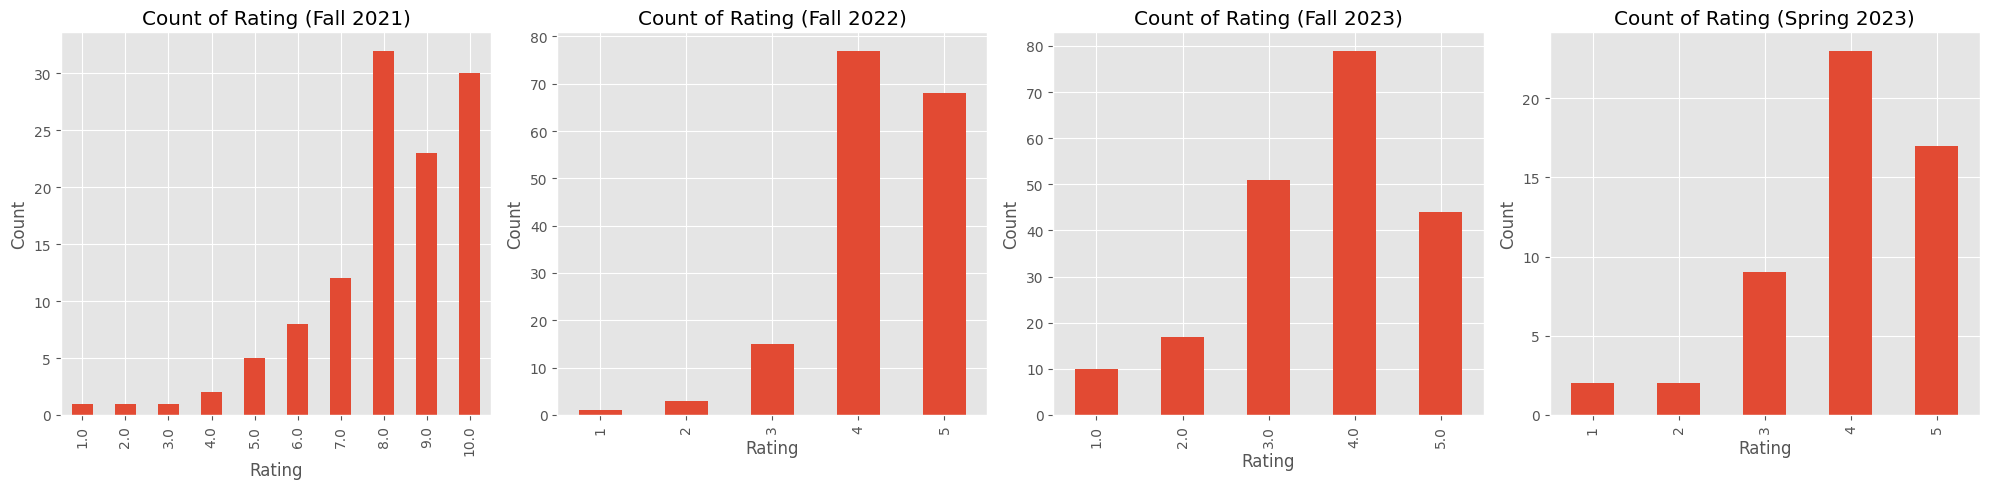

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))





for i, df in enumerate(dfs):
    df['overall_rating'].value_counts().sort_index().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Count of Rating ({titles[i]})')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
student_fall_22.head()

,id,attend_in_person_fair,companies_researched_before_fair,overall_rating,feedback_what_worked,feedback_what_did_not_work,feedback_improve_fair,attend_virtual_fair,rate_virtual_career_fair,favorite_features_virtual_app,...,rate_welcome_social_accessibility,rate_welcome_social_company_diversity,impact_welcome_social_on_fair,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,rate_documentation
0,1,Yes,11,1,Not much,"Layout, where companies were located",The booths are placed too close together to al...,No,NaN,NaN,...,NaN,NaN,NaN,NaN,4,Texas A&M Career Center (https://careercenter....,Company Search/Information,Need better accommodations for students with d...,4,3
1,2,Yes,4,2,Many companies,Not enough space for lines,Bigger companies should probably have more spa...,No,NaN,NaN,...,NaN,NaN,NaN,NaN,3,Friends/Classmates,"Company Search/Information, Student Checklist",emails,4,4
2,3,Yes,2,2,well-organized,very crowded,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,5,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,5,3
3,4,Yes,1,2,There were a lot of companies,There were too many people and lines were long...,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,2,Major/Department Weekly Emails,I did not use any of the above resources,NaN,4,2
4,5,Yes,12,3,I was very happy to see more firms hiring for ...,The check in system this year felt slower than...,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,4,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,3


In [10]:
student_spring_23.head()

,id,major,attend_in_person_fair,prepare_options,nr_companies_consider_working,top_companies_enjoyed,overall_rating,nr_recruiters_spoke_to,nr_hours,feedback_in_person,...,feedback_company_showcase,attend_welcome_social,rate_welcome_social,feedback_welcome_social,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info
0,1,Other,Yes,"Updated and printed your resume, Looked at the...",6,"FBI, SICK",4,4,1-3 Hours,I did not like having to go outside to get to ...,...,NaN,No,NaN,NaN,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,NaN
1,2,Civil and Environmental Engineering,Yes,"Updated and printed your resume, Looked at the...",1,Quiddity and TxDOT,4,2,1-3 Hours,Better Info on the two different entrances,...,NaN,No,NaN,NaN,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,NaN
2,3,Electrical and Computer Engineering,Yes,"Updated and printed your resume, Looked at the...",5,Hydroquip\nCharter,5,13,1-3 Hours,I liked the bag drop off and pick up,...,NaN,No,NaN,NaN,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",NaN,5,NaN
3,4,Multidisciplinary Engineering,Yes,Updated and printed your resume,2,Beckhoff,2,10,1-3 Hours,It’s annoying when companies say they are hiri...,...,NaN,No,NaN,NaN,1,Friends/Classmates,NaN,NaN,2,Please instruct companies to know what majors ...
4,5,Other,Yes,"Updated and printed your resume, Looked at the...",10,Sparx,3,4,1-3 Hours,did not like having to exit to get to \nthe ot...,...,NaN,No,NaN,NaN,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",NaN,3,NaN


In [11]:
student_fall_21['Year'] = 'Fall 2021'
student_fall_22['Year'] = 'Fall 2022'
student_fall_23['Year'] = 'Fall 2023'
student_spring_23['Year'] = 'Spring 2023'

columns_of_interest_fall_21 = ['any_dislike_comm', 'feedback_company_showcase', 'feedback_documentation', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'other_comm']
columns_of_interest_fall_22 = ['feedback_what_worked', 'feedback_what_did_not_work','feedback_improve_fair', 'feedback_company_showcase', 'feedback_welcome_social', 'feedback_communication']
columns_of_interest_fall_23 = ['feedback_in_person']
columns_of_interest_spring_23 = ['feedback_in_person', 'feedback_communication', 'add_info']

columns_of_interest_dict = {
    'Fall 2021': columns_of_interest_fall_21,
    'Fall 2022': columns_of_interest_fall_22,
    'Fall 2023': columns_of_interest_fall_23,
    'Spring 2023': columns_of_interest_spring_23
}

In [12]:
for df, title in zip(dfs, titles):
    print(f"Original columns for {title}: {df.columns.tolist()}")
for df, title in zip(dfs, titles):
    columns_of_interest = columns_of_interest_dict.get(title, [])
    renamed_columns = [f"{col}_{title.replace(' ', '_').lower()}" for col in columns_of_interest]
    print(f"Renamed columns for {title}: {renamed_columns}")

Original columns for Fall 2021: ['id', 'major', 'classification', 'attend_company_showcase', 'rate_company_showcase', 'feedback_company_showcase', 'where_found_info', 'use_any_website_resources', 'any_dislike_comm', 'rate_whether_info_sent_timely', 'rate_documentation', 'feedback_documentation', 'date', 'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'rate_career_virtual_platform', 'issues_career_virtual_platform', 'favorite_features_career_virtual_platform', 'future_features_career_virtual_platform', 'other_comm', 'Year']
Original columns for Fall 2022: ['id', 'attend_in_person_fair', 'companies_researched_before_fair', 'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_improve_fair', 'attend_virtual_fair', 'rate_virtual_career_fair', 'favorite_features_virtual_app', 'issues_virtual_career_app', 'future_features_career_app', 'attend_company_showcase', 'rate_company_showcase', 'rate_company_showcase_accessab

# Running sentiment analysis on each df separately # 
## (see: problems_encountered_and_solutions.txt for reason why) ##

In [13]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [14]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [15]:



def sentiment_score(review):
    if pd.isna(review):
        return -1  # i'd want to set this to -1 since there could be text evaluated with a sentiment score of 0 
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1



# Apply sentiment analysis and add to dataframes
for df, title in zip(dfs, titles):
    columns_of_interest = columns_of_interest_dict.get(title, [])
    suffix = title.replace(' ', '_').lower()
    for col in columns_of_interest:
        if col in df.columns:
            sentiment_col_name = f'{col}_sentiment_{suffix}'
            df[sentiment_col_name] = df[col].apply(sentiment_score)


In [16]:
student_fall_21.columns

Index(['id', 'major', 'classification', 'attend_company_showcase',
       'rate_company_showcase', 'feedback_company_showcase',
       'where_found_info', 'use_any_website_resources', 'any_dislike_comm',
       'rate_whether_info_sent_timely', 'rate_documentation',
       'feedback_documentation', 'date', 'overall_rating',
       'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_career_fair', 'rate_career_virtual_platform',
       'issues_career_virtual_platform',
       'favorite_features_career_virtual_platform',
       'future_features_career_virtual_platform', 'other_comm', 'Year',
       'any_dislike_comm_sentiment_fall_2021',
       'feedback_company_showcase_sentiment_fall_2021',
       'feedback_documentation_sentiment_fall_2021',
       'feedback_what_worked_sentiment_fall_2021',
       'feedback_what_did_not_work_sentiment_fall_2021',
       'feedback_career_fair_sentiment_fall_2021',
       'other_comm_sentiment_fall_2021'],
      dtype='object')

In [17]:
student_spring_23.head()

,id,major,attend_in_person_fair,prepare_options,nr_companies_consider_working,top_companies_enjoyed,overall_rating,nr_recruiters_spoke_to,nr_hours,feedback_in_person,...,rate_ability_to_communicate_info,where_found_info,use_any_website_resources,feedback_communication,rate_whether_info_sent_timely,add_info,Year,feedback_in_person_sentiment_spring_2023,feedback_communication_sentiment_spring_2023,add_info_sentiment_spring_2023
0,1,Other,Yes,"Updated and printed your resume, Looked at the...",6,"FBI, SICK",4,4,1-3 Hours,I did not like having to go outside to get to ...,...,3,"College of Engineering Weekly Emails, Major/De...",Company Search/Information,More emails farther out from the week that cla...,2,NaN,Spring 2023,2,2,-1
1,2,Civil and Environmental Engineering,Yes,"Updated and printed your resume, Looked at the...",1,Quiddity and TxDOT,4,2,1-3 Hours,Better Info on the two different entrances,...,3,SEC Career Fair Website (https://careerfair.se...,Company Search/Information,NaN,4,NaN,Spring 2023,3,-1,-1
2,3,Electrical and Computer Engineering,Yes,"Updated and printed your resume, Looked at the...",5,Hydroquip\nCharter,5,13,1-3 Hours,I liked the bag drop off and pick up,...,5,"College of Engineering Weekly Emails, Major/De...","Company Search/Information, Student Checklist",NaN,5,NaN,Spring 2023,4,-1,-1
3,4,Multidisciplinary Engineering,Yes,Updated and printed your resume,2,Beckhoff,2,10,1-3 Hours,It’s annoying when companies say they are hiri...,...,1,Friends/Classmates,NaN,NaN,2,Please instruct companies to know what majors ...,Spring 2023,3,-1,5
4,5,Other,Yes,"Updated and printed your resume, Looked at the...",10,Sparx,3,4,1-3 Hours,did not like having to exit to get to \nthe ot...,...,3,SEC Career Fair Website (https://careerfair.se...,"Company Search/Information, Symplicity tutoria...",NaN,3,NaN,Spring 2023,2,-1,-1


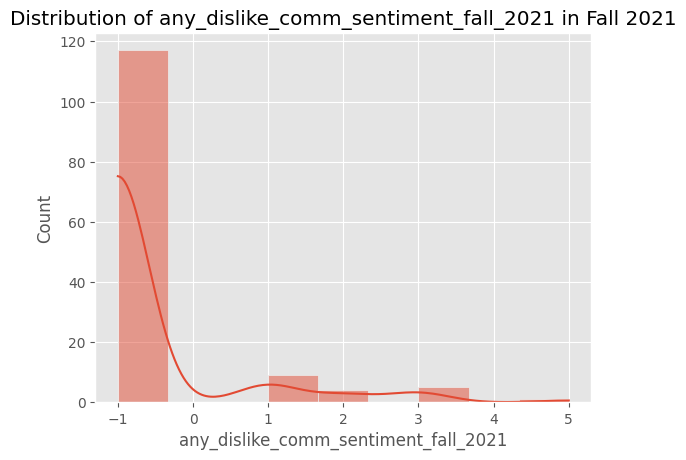

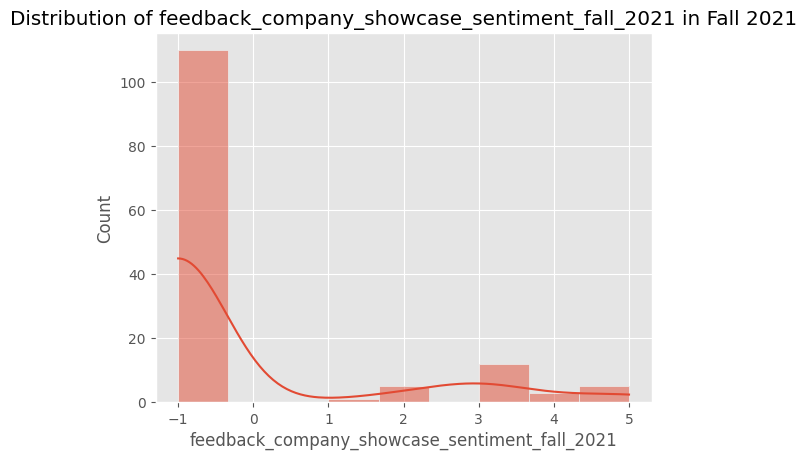

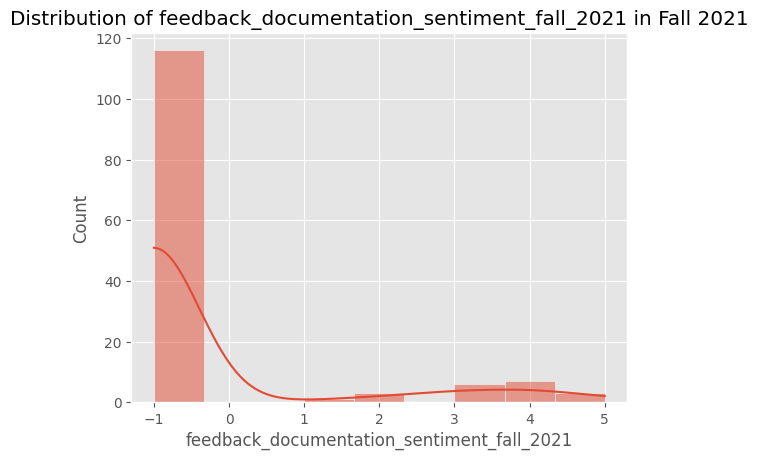

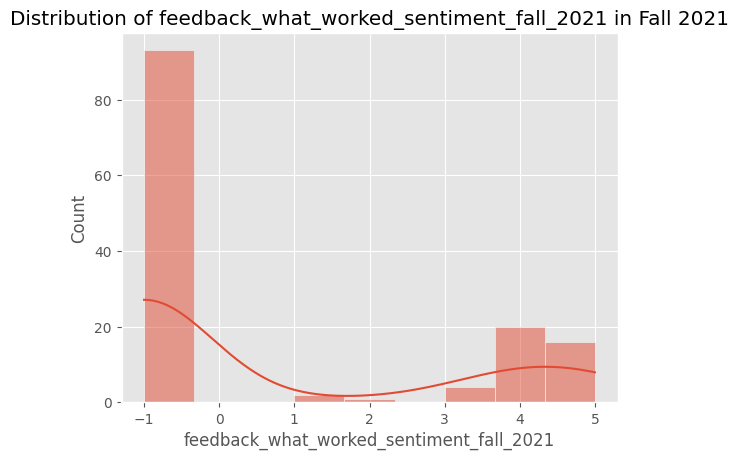

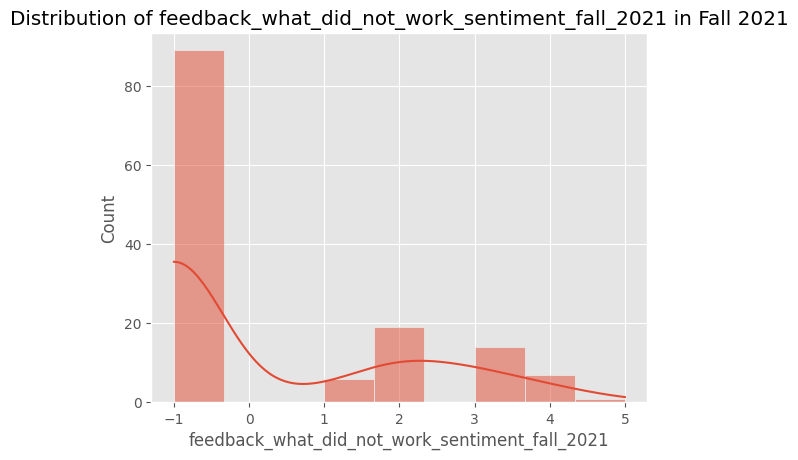

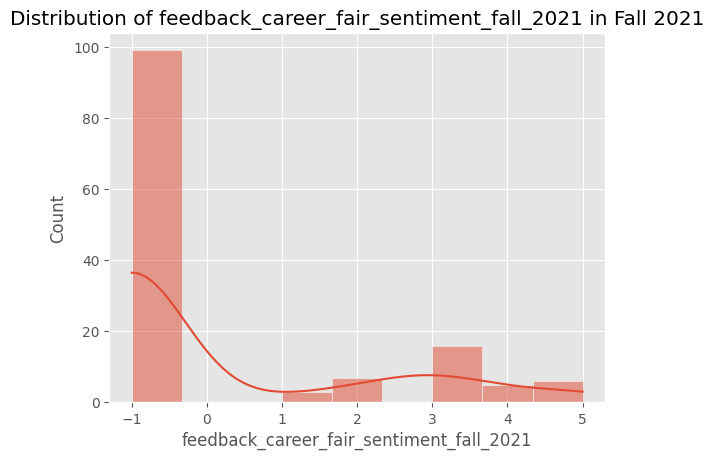

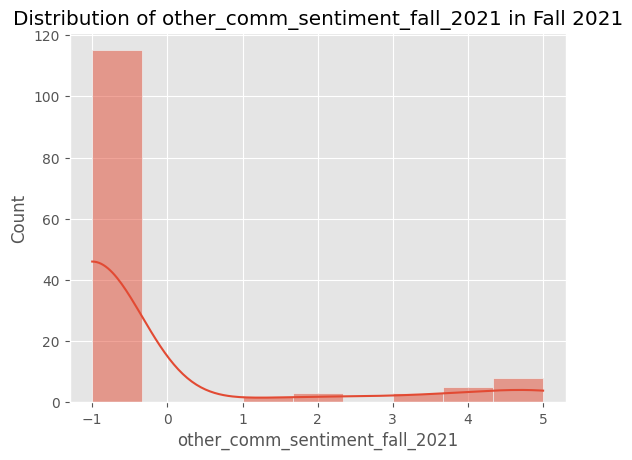

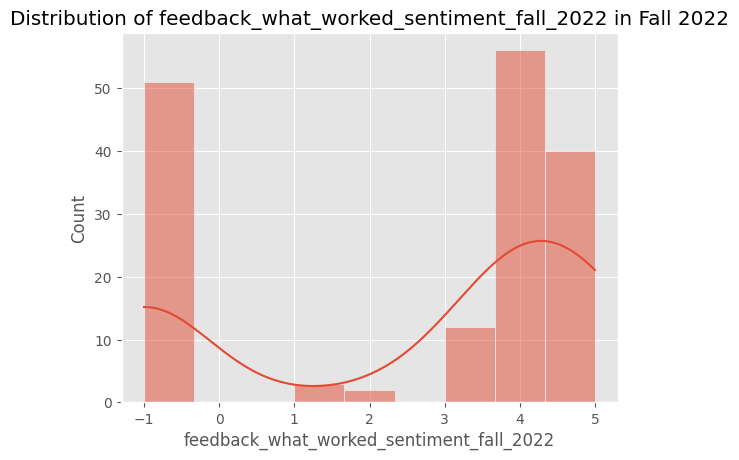

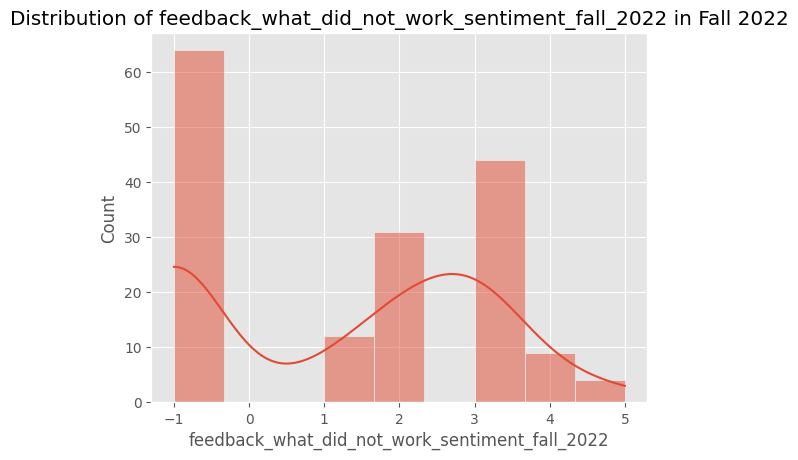

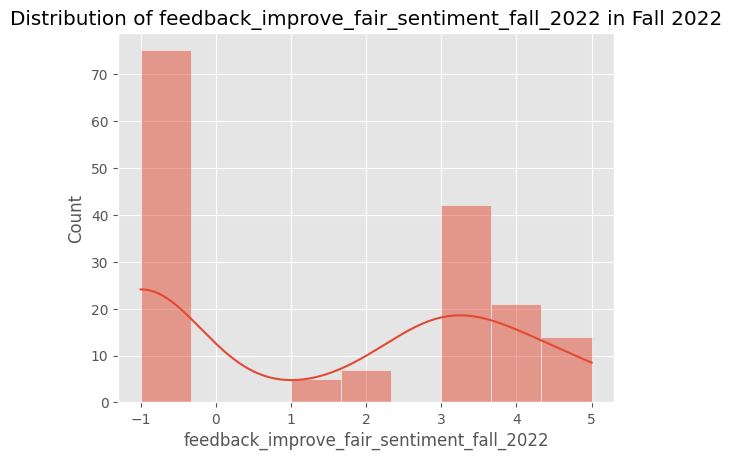

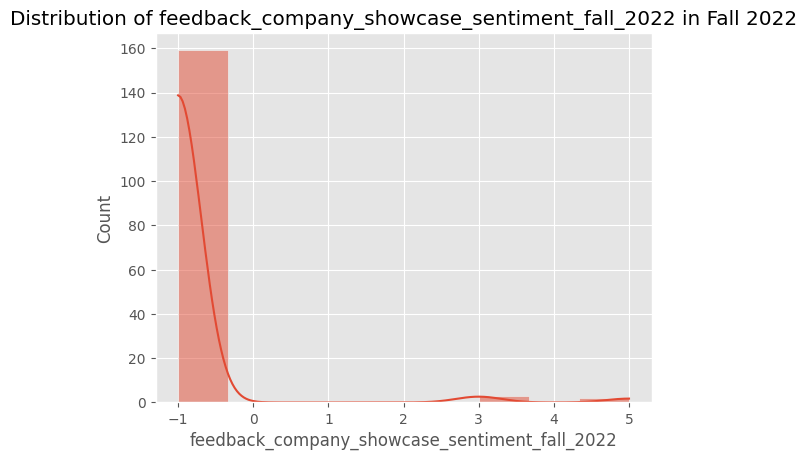

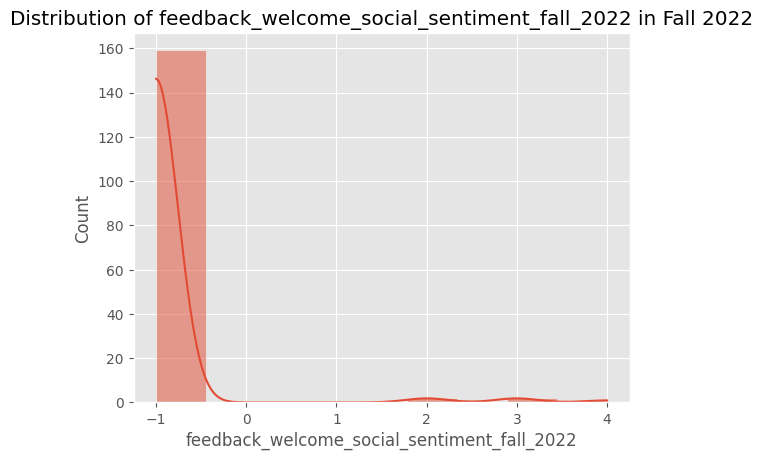

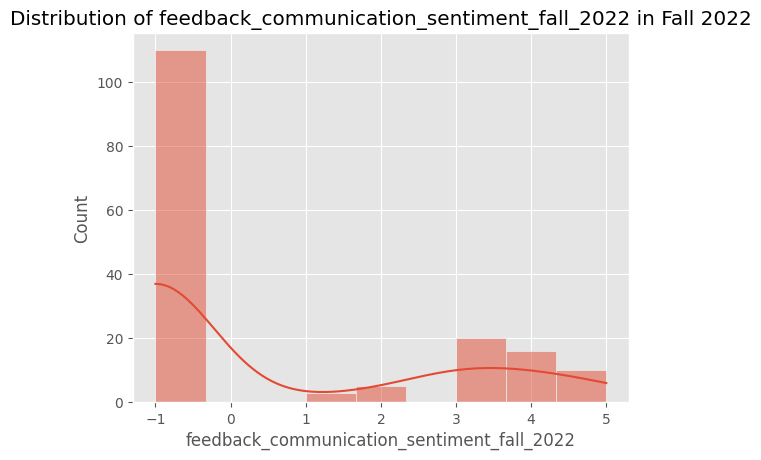

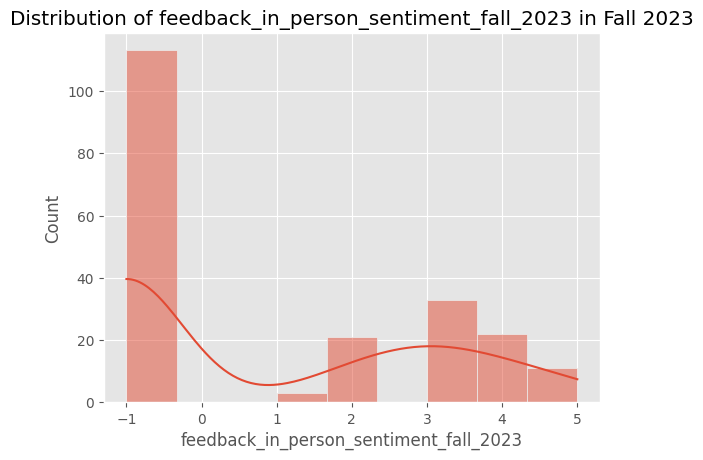

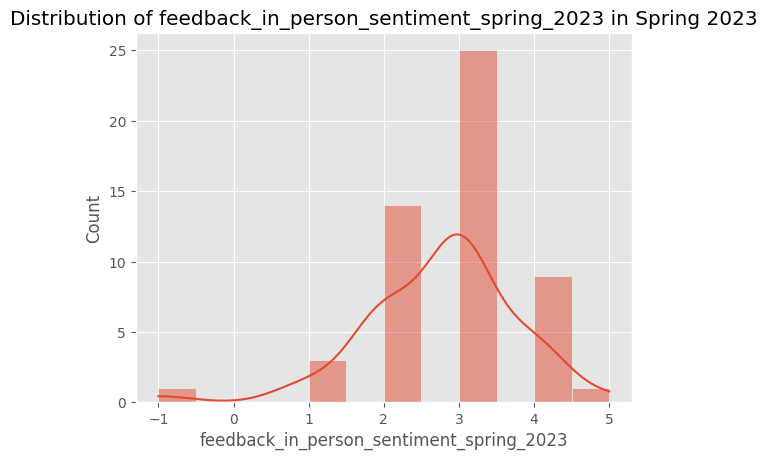

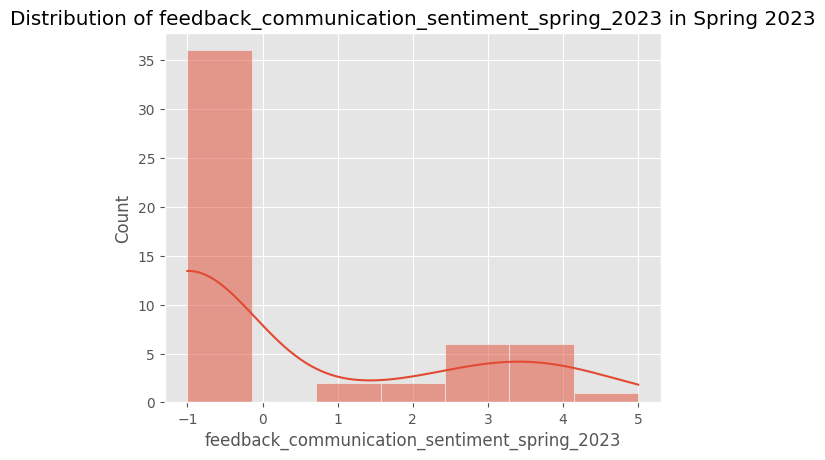

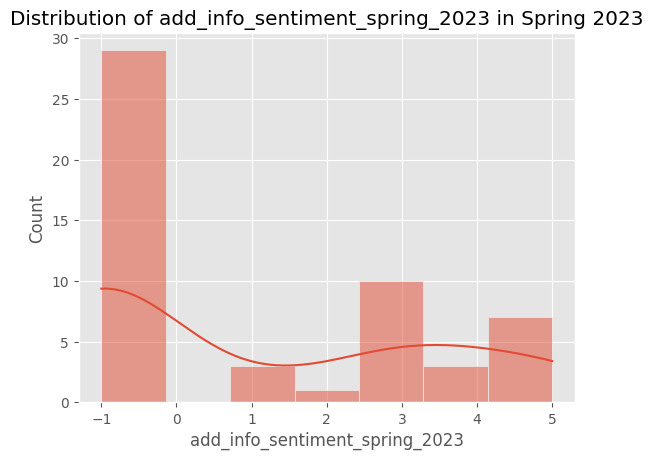

In [18]:


for df, title in zip(dfs, titles):
    sentiment_columns = [col for col in df.columns if '_sentiment_' in col]
    for col in sentiment_columns:
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} in {title}')
        plt.show()



In [19]:

"""
columns_of_interest_fall_21 = ['any_dislike_comm', 'feedback_company_showcase', 'feedback_documentation', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'other_comm']
columns_of_interest_fall_22 = ['feedback_what_worked', 'feedback_what_did_not_work','feedback_improve_fair', 'feedback_communication', 'feedback_comm_extra']
columns_of_interest_fall_23 = ['feedback_in_person\n\nfeedback_in_person']
columns_of_interest_spring_23 = ['feedback_in_person', 'feedback_communication', 'add_info']
"""

"\ncolumns_of_interest_fall_21 = ['any_dislike_comm', 'feedback_company_showcase', 'feedback_documentation', 'feedback_what_worked', 'feedback_what_did_not_work', 'feedback_career_fair', 'other_comm']\ncolumns_of_interest_fall_22 = ['feedback_what_worked', 'feedback_what_did_not_work','feedback_improve_fair', 'feedback_communication', 'feedback_comm_extra']\ncolumns_of_interest_fall_23 = ['feedback_in_person\n\nfeedback_in_person']\ncolumns_of_interest_spring_23 = ['feedback_in_person', 'feedback_communication', 'add_info']\n"

In [20]:
#I want to visualize
#I have these scores in columns right and first let's see feedback_career_fair for 2021, feedback_improve_fair 2022, 'feedback_in_person\n\nfeedback_in_person' fall 2023, feedback_in_person spring 2023

In [21]:

"""
# these 4 are a subset of the sentiment columns that are similar data
columns_to_analyze = {
    'fall_2021': 'feedback_career_fair_sentiment_fall_2021',
    'fall_2022': 'feedback_improve_fair_sentiment_fall_2022',
    'fall_2023': 'feedback_in_person\n\nfeedback_in_person_sentiment_fall_2023',
    'spring_2023': 'feedback_in_person_sentiment_spring_2023'
}

extracted_data = {}
for df, title in zip(dfs, titles):
    sentiment_column = columns_to_analyze.get(title.replace(' ', '_').lower(), None)
    if sentiment_column and sentiment_column in df.columns:
        extracted_data[title] = df[sentiment_column]

for title, data in extracted_data.items():
    sns.histplot(data, kde=True)
    plt.title(f'Distribution of Sentiment Scores for {title.replace("_", " ").title()}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()
"""

'\n# these 4 are a subset of the sentiment columns that are similar data\ncolumns_to_analyze = {\n    \'fall_2021\': \'feedback_career_fair_sentiment_fall_2021\',\n    \'fall_2022\': \'feedback_improve_fair_sentiment_fall_2022\',\n    \'fall_2023\': \'feedback_in_person\n\nfeedback_in_person_sentiment_fall_2023\',\n    \'spring_2023\': \'feedback_in_person_sentiment_spring_2023\'\n}\n\nextracted_data = {}\nfor df, title in zip(dfs, titles):\n    sentiment_column = columns_to_analyze.get(title.replace(\' \', \'_\').lower(), None)\n    if sentiment_column and sentiment_column in df.columns:\n        extracted_data[title] = df[sentiment_column]\n\nfor title, data in extracted_data.items():\n    sns.histplot(data, kde=True)\n    plt.title(f\'Distribution of Sentiment Scores for {title.replace("_", " ").title()}\')\n    plt.xlabel(\'Sentiment Score\')\n    plt.ylabel(\'Frequency\')\n    plt.show()\n'

In [22]:
student_fall_21.columns

Index(['id', 'major', 'classification', 'attend_company_showcase',
       'rate_company_showcase', 'feedback_company_showcase',
       'where_found_info', 'use_any_website_resources', 'any_dislike_comm',
       'rate_whether_info_sent_timely', 'rate_documentation',
       'feedback_documentation', 'date', 'overall_rating',
       'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_career_fair', 'rate_career_virtual_platform',
       'issues_career_virtual_platform',
       'favorite_features_career_virtual_platform',
       'future_features_career_virtual_platform', 'other_comm', 'Year',
       'any_dislike_comm_sentiment_fall_2021',
       'feedback_company_showcase_sentiment_fall_2021',
       'feedback_documentation_sentiment_fall_2021',
       'feedback_what_worked_sentiment_fall_2021',
       'feedback_what_did_not_work_sentiment_fall_2021',
       'feedback_career_fair_sentiment_fall_2021',
       'other_comm_sentiment_fall_2021'],
      dtype='object')

# Define a function to create sentiment columns based on a semester prefix #

In [23]:

def get_sentiment_columns(df, semester_prefix):
    return [col for col in df.columns if col.endswith(f'sentiment_{semester_prefix}')]

# Create lists for each DataFrame
sentiment_columns_fall_21 = get_sentiment_columns(student_fall_21, 'fall_2021')
sentiment_columns_fall_22 = get_sentiment_columns(student_fall_22, 'fall_2022')
sentiment_columns_fall_23 = get_sentiment_columns(student_fall_23, 'fall_2023')
sentiment_columns_spring_23 = get_sentiment_columns(student_spring_23, 'spring_2023')

sentiment_columns_fall_22

['feedback_what_worked_sentiment_fall_2022',
 'feedback_what_did_not_work_sentiment_fall_2022',
 'feedback_improve_fair_sentiment_fall_2022',
 'feedback_company_showcase_sentiment_fall_2022',
 'feedback_welcome_social_sentiment_fall_2022',
 'feedback_communication_sentiment_fall_2022']

In [24]:
sentiment_columns_fall_22

['feedback_what_worked_sentiment_fall_2022',
 'feedback_what_did_not_work_sentiment_fall_2022',
 'feedback_improve_fair_sentiment_fall_2022',
 'feedback_company_showcase_sentiment_fall_2022',
 'feedback_welcome_social_sentiment_fall_2022',
 'feedback_communication_sentiment_fall_2022']

In [25]:
student_fall_21

,id,major,classification,attend_company_showcase,rate_company_showcase,feedback_company_showcase,where_found_info,use_any_website_resources,any_dislike_comm,rate_whether_info_sent_timely,...,future_features_career_virtual_platform,other_comm,Year,any_dislike_comm_sentiment_fall_2021,feedback_company_showcase_sentiment_fall_2021,feedback_documentation_sentiment_fall_2021,feedback_what_worked_sentiment_fall_2021,feedback_what_did_not_work_sentiment_fall_2021,feedback_career_fair_sentiment_fall_2021,other_comm_sentiment_fall_2021
0,1,Petroleum Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
1,2,Aerospace Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist,...",NaN,NaN,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,3,-1,-1
2,3,Mechanical Engineering,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,3,-1,-1
3,4,Mechanical Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
4,5,Electronic Systems Engineering Technology,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Mechanical Engineering,Freshman,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist,...",NaN,9.0,...,NaN,I appreciate everything you did! It was a good...,Fall 2021,-1,-1,-1,-1,-1,-1,4
132,133,Industrial & Systems Engineering,Masters,Yes,8.0,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
133,134,Civil & Environmental Engineering,Senior,No,NaN,NaN,"SEC Social Media (Instagram, Facebook, or Link...","Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1
134,135,Computer Science,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist",NaN,7.0,...,NaN,NaN,Fall 2021,-1,-1,-1,-1,-1,-1,-1


In [26]:
# Loop through each DataFrame, title, and suffix
for df, title, suffix in zip(dfs, titles, suffixes):
    # Construct the variable name for the sentiment columns
    sentiment_columns_var = f'sentiment_columns_{suffix}'
    
    # Get the actual list of sentiment columns from the variable name
    sentiment_columns = globals()[sentiment_columns_var]
    
    # Loop through each column in the sentiment columns
    for col in sentiment_columns:
        print(f"Value counts for {col} in {title}:")
        print(df[col].value_counts())
        print("\n")

Value counts for any_dislike_comm_sentiment_fall_2021 in Fall 2021:
any_dislike_comm_sentiment_fall_2021
-1    117
 1      9
 3      5
 2      4
 5      1
Name: count, dtype: int64


Value counts for feedback_company_showcase_sentiment_fall_2021 in Fall 2021:
feedback_company_showcase_sentiment_fall_2021
-1    110
 3     12
 5      5
 2      5
 4      3
 1      1
Name: count, dtype: int64


Value counts for feedback_documentation_sentiment_fall_2021 in Fall 2021:
feedback_documentation_sentiment_fall_2021
-1    116
 4      7
 3      6
 2      3
 5      3
 1      1
Name: count, dtype: int64


Value counts for feedback_what_worked_sentiment_fall_2021 in Fall 2021:
feedback_what_worked_sentiment_fall_2021
-1    93
 4    20
 5    16
 3     4
 1     2
 2     1
Name: count, dtype: int64


Value counts for feedback_what_did_not_work_sentiment_fall_2021 in Fall 2021:
feedback_what_did_not_work_sentiment_fall_2021
-1    89
 2    19
 3    14
 4     7
 1     6
 5     1
Name: count, dtype: int64



### Test if the -1 values (aka what the sentiment analyzer put in for NaN values) is randomly distributed. This is important because if these values are not randomly dist. and we reject the null, there are underlying relationships I need to explore ###

In [27]:
from statsmodels.sandbox.stats.runs import runstest_1samp

def run_tests_for_sentiment_columns(df, sentiment_columns, title):
    for col in sentiment_columns:
        if col in df.columns:
            binary_sequence = (df[col] == -1).astype(int)
            z_stat, p_value = runstest_1samp(binary_sequence, correction=False)
            print(f'Run Test p-value for {col} in {title}: {p_value}')
        else:
            print(f'Column {col} not found in {title} DataFrame.')

# Loop through each DataFrame, title, and suffix
for df, title, suffix in zip(dfs, titles, suffixes):
    sentiment_columns_var = f'sentiment_columns_{suffix}'
    sentiment_columns = globals().get(sentiment_columns_var, [])
    
    # Print the sentiment columns to verify
    print()
    print()
    print(f"Sentiment columns for {title}: {sentiment_columns}")
    print()
    print()
    run_tests_for_sentiment_columns(df, sentiment_columns, title)



Sentiment columns for Fall 2021: ['any_dislike_comm_sentiment_fall_2021', 'feedback_company_showcase_sentiment_fall_2021', 'feedback_documentation_sentiment_fall_2021', 'feedback_what_worked_sentiment_fall_2021', 'feedback_what_did_not_work_sentiment_fall_2021', 'feedback_career_fair_sentiment_fall_2021', 'other_comm_sentiment_fall_2021']


Run Test p-value for any_dislike_comm_sentiment_fall_2021 in Fall 2021: 0.2323148280863483
Run Test p-value for feedback_company_showcase_sentiment_fall_2021 in Fall 2021: 0.2564416977071323
Run Test p-value for feedback_documentation_sentiment_fall_2021 in Fall 2021: 0.9675623740560144
Run Test p-value for feedback_what_worked_sentiment_fall_2021 in Fall 2021: 0.24705099220802906
Run Test p-value for feedback_what_did_not_work_sentiment_fall_2021 in Fall 2021: 0.5032892771094521
Run Test p-value for feedback_career_fair_sentiment_fall_2021 in Fall 2021: 0.4952447038218779
Run Test p-value for other_comm_sentiment_fall_2021 in Fall 2021: 0.6151913

In [28]:
# Function to calculate proportions excluding -1
def calculate_proportions(column):
    # Filter out -1 values and then calculate proportions
    filtered_column = column[column != -1]
    return filtered_column.value_counts(normalize=True).sort_index()

# Create copies of the DataFrames before modification
dfs_before = {title: df.copy() for title, df in zip(titles, dfs)}

# Dictionary of sentiment columns
sentiment_columns_dict = {
    'Fall 2021': sentiment_columns_fall_21,
    'Fall 2022': sentiment_columns_fall_22,
    'Fall 2023': sentiment_columns_fall_23,
    'Spring 2023': sentiment_columns_spring_23
}

# Store proportions before imputation
before_imputation_proportions = {}
for title, df in zip(titles, dfs):
    sentiment_cols = sentiment_columns_dict[title]
    for col in sentiment_cols:
        before_imputation_proportions[(title, col)] = calculate_proportions(df[col])

# Apply imputation
def proportion_based_imputation(df, columns):
    for col in columns:
        # Calculate the proportions of non-`-1` values
        value_counts = df[df[col] != -1][col].value_counts(normalize=True)
        
        # Get the indices where values are `-1`
        missing_indices = df[df[col] == -1].index
        
        # Impute based on proportions
        if len(missing_indices) > 0:
            imputed_values = np.random.choice(value_counts.index, size=len(missing_indices), p=value_counts.values)
            df.loc[missing_indices, col] = imputed_values
    return df

for title, df in zip(titles, dfs):
    sentiment_cols = sentiment_columns_dict[title]
    dfs[titles.index(title)] = proportion_based_imputation(df, sentiment_cols)

# Store proportions after imputation
after_imputation_proportions = {}
for title, df in zip(titles, dfs):
    sentiment_cols = sentiment_columns_dict[title]
    for col in sentiment_cols:
        after_imputation_proportions[(title, col)] = calculate_proportions(df[col])

# Compare proportions before and after imputation
for title, df in zip(titles, dfs):
    sentiment_cols = sentiment_columns_dict[title]
    for col in sentiment_cols:
        print(f"Proportions for {col} in {title} before imputation:")
        print(before_imputation_proportions[(title, col)])
        print(f"Proportions for {col} in {title} after imputation:")
        print(after_imputation_proportions[(title, col)])
        print("\n")


Proportions for any_dislike_comm_sentiment_fall_2021 in Fall 2021 before imputation:
any_dislike_comm_sentiment_fall_2021
1    0.473684
2    0.210526
3    0.263158
5    0.052632
Name: proportion, dtype: float64
Proportions for any_dislike_comm_sentiment_fall_2021 in Fall 2021 after imputation:
any_dislike_comm_sentiment_fall_2021
1    0.507353
2    0.250000
3    0.213235
5    0.029412
Name: proportion, dtype: float64


Proportions for feedback_company_showcase_sentiment_fall_2021 in Fall 2021 before imputation:
feedback_company_showcase_sentiment_fall_2021
1    0.038462
2    0.192308
3    0.461538
4    0.115385
5    0.192308
Name: proportion, dtype: float64
Proportions for feedback_company_showcase_sentiment_fall_2021 in Fall 2021 after imputation:
feedback_company_showcase_sentiment_fall_2021
1    0.029412
2    0.213235
3    0.419118
4    0.161765
5    0.176471
Name: proportion, dtype: float64


Proportions for feedback_documentation_sentiment_fall_2021 in Fall 2021 before imputation:

In [29]:
for title, df in zip(titles, dfs):
    sentiment_cols = sentiment_columns_dict[title]
    for col in sentiment_cols:
        print(f"Value counts for {col} in {title}:")
        print(df[col].value_counts())
        print("\n")

Value counts for any_dislike_comm_sentiment_fall_2021 in Fall 2021:
any_dislike_comm_sentiment_fall_2021
1    69
2    34
3    29
5     4
Name: count, dtype: int64


Value counts for feedback_company_showcase_sentiment_fall_2021 in Fall 2021:
feedback_company_showcase_sentiment_fall_2021
3    57
2    29
5    24
4    22
1     4
Name: count, dtype: int64


Value counts for feedback_documentation_sentiment_fall_2021 in Fall 2021:
feedback_documentation_sentiment_fall_2021
4    41
3    38
2    23
5    22
1    12
Name: count, dtype: int64


Value counts for feedback_what_worked_sentiment_fall_2021 in Fall 2021:
feedback_what_worked_sentiment_fall_2021
4    57
5    55
3    13
2     6
1     5
Name: count, dtype: int64


Value counts for feedback_what_did_not_work_sentiment_fall_2021 in Fall 2021:
feedback_what_did_not_work_sentiment_fall_2021
2    53
3    46
4    23
1    13
5     1
Name: count, dtype: int64


Value counts for feedback_career_fair_sentiment_fall_2021 in Fall 2021:
feedback_care

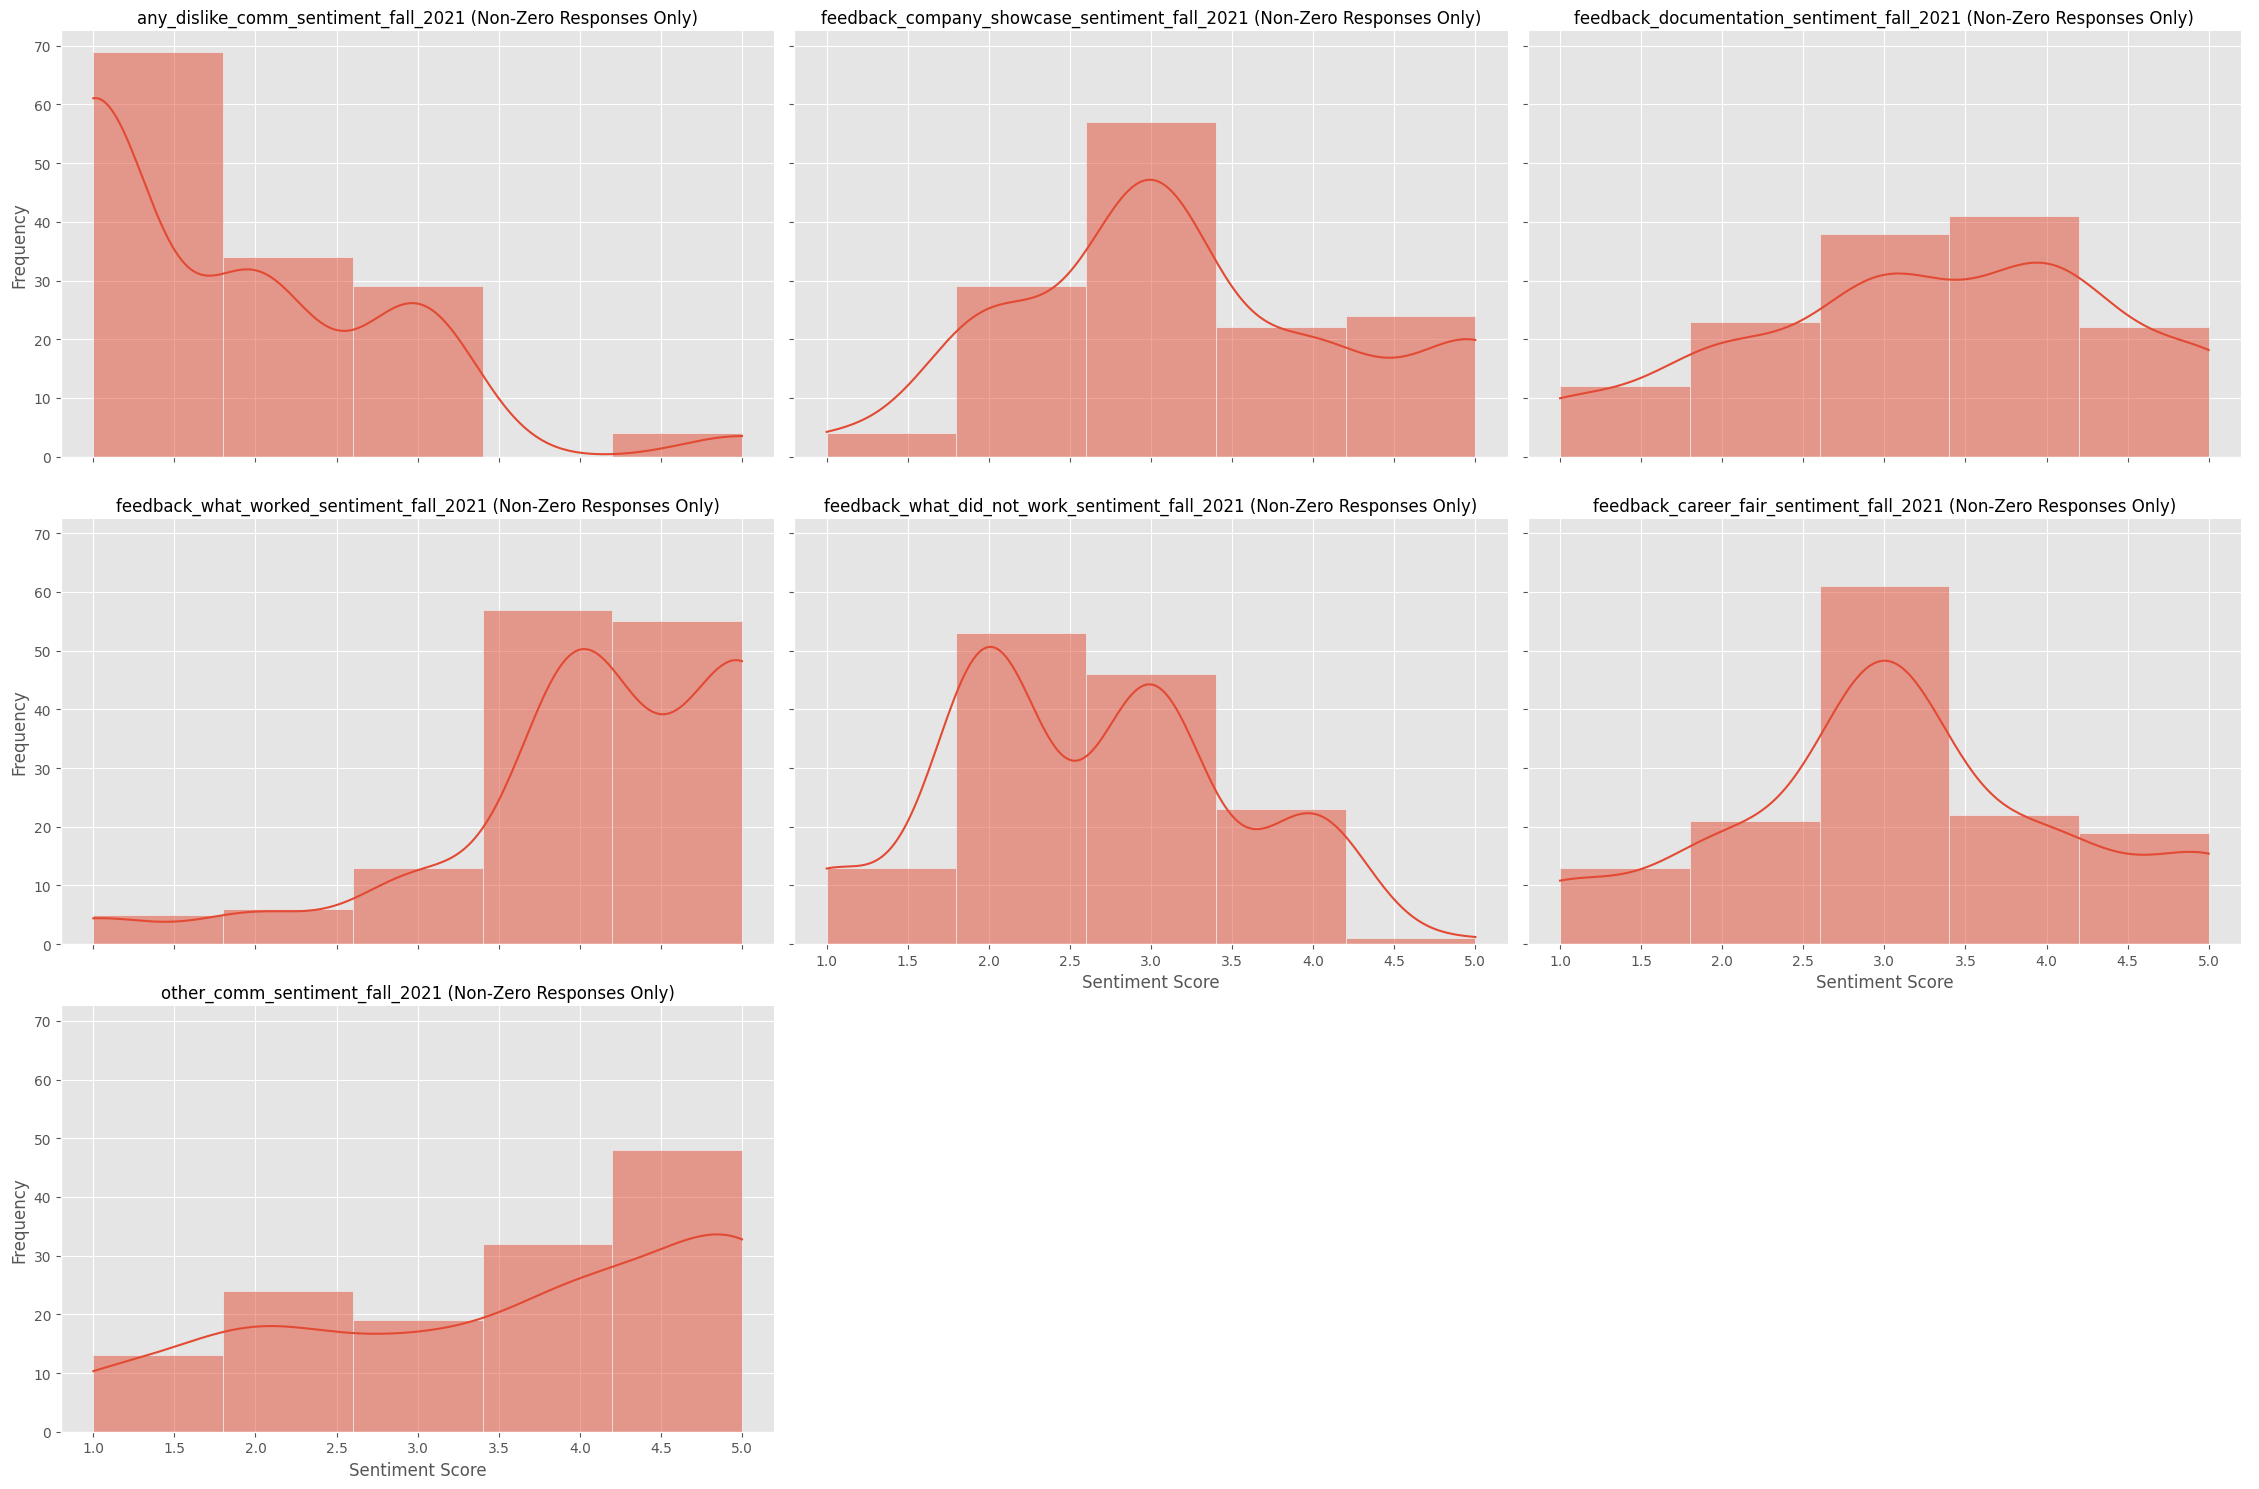

In [30]:

"""
for col in sentiment_columns_fall_21:
    non_zero_responses = student_fall_21[col][student_fall_21[col] > 0]
    plt.figure(figsize=(10, 6))
    sns.histplot(non_zero_responses, kde=True, bins=5)
    plt.title(f'Distribution of {col} (Non-Zero Responses Only)')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()
    
"""


# Prepare data in a long-form DataFrame
data = student_fall_21[sentiment_columns_fall_21].melt(var_name='Sentiment Category', value_name='Sentiment Score')

# Create the FacetGrid
g = sns.FacetGrid(data, col='Sentiment Category', col_wrap=3, height=5, aspect=1.5)
g.map_dataframe(sns.histplot, x='Sentiment Score', kde=True, bins=5)

# Set titles and labels
g.set_titles(col_template="{col_name} (Non-Zero Responses Only)")
g.set_axis_labels('Sentiment Score', 'Frequency')
g.add_legend()

plt.tight_layout()
plt.show()


In [31]:
student_fall_21

,id,major,classification,attend_company_showcase,rate_company_showcase,feedback_company_showcase,where_found_info,use_any_website_resources,any_dislike_comm,rate_whether_info_sent_timely,...,future_features_career_virtual_platform,other_comm,Year,any_dislike_comm_sentiment_fall_2021,feedback_company_showcase_sentiment_fall_2021,feedback_documentation_sentiment_fall_2021,feedback_what_worked_sentiment_fall_2021,feedback_what_did_not_work_sentiment_fall_2021,feedback_career_fair_sentiment_fall_2021,other_comm_sentiment_fall_2021
0,1,Petroleum Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,2,3,2,4,2,3,5
1,2,Aerospace Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist,...",NaN,NaN,...,NaN,NaN,Fall 2021,1,5,5,4,3,3,1
2,3,Mechanical Engineering,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,1,4,3,3,3,4,4
3,4,Mechanical Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,2,4,4,4,4,3,4
4,5,Electronic Systems Engineering Technology,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,1,3,4,3,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Mechanical Engineering,Freshman,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist,...",NaN,9.0,...,NaN,I appreciate everything you did! It was a good...,Fall 2021,1,3,2,4,2,3,4
132,133,Industrial & Systems Engineering,Masters,Yes,8.0,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,1,3,4,5,2,5,2
133,134,Civil & Environmental Engineering,Senior,No,NaN,NaN,"SEC Social Media (Instagram, Facebook, or Link...","Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,3,2,5,5,4,2,5
134,135,Computer Science,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist",NaN,7.0,...,NaN,NaN,Fall 2021,1,3,4,5,2,4,4


# Now we can do some more EDA comparing the scores in the sentiment columns to the responses #

In [32]:
print(student_fall_21.shape)
print(student_fall_22.shape)
print(student_spring_23.shape)

print()


print(student_fall_21['attend_company_showcase'].value_counts())
print()
print(student_fall_22['attend_company_showcase'].value_counts())
print()
print(student_spring_23['attend_company_showcase'].value_counts())

(136, 30)
(164, 37)
(53, 27)

attend_company_showcase
No     98
Yes    37
Name: count, dtype: int64

attend_company_showcase
No     152
Yes     11
Name: count, dtype: int64

attend_company_showcase
No     50
Yes     3
Name: count, dtype: int64


In [33]:
student_fall_21

,id,major,classification,attend_company_showcase,rate_company_showcase,feedback_company_showcase,where_found_info,use_any_website_resources,any_dislike_comm,rate_whether_info_sent_timely,...,future_features_career_virtual_platform,other_comm,Year,any_dislike_comm_sentiment_fall_2021,feedback_company_showcase_sentiment_fall_2021,feedback_documentation_sentiment_fall_2021,feedback_what_worked_sentiment_fall_2021,feedback_what_did_not_work_sentiment_fall_2021,feedback_career_fair_sentiment_fall_2021,other_comm_sentiment_fall_2021
0,1,Petroleum Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,2,3,2,4,2,3,5
1,2,Aerospace Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist,...",NaN,NaN,...,NaN,NaN,Fall 2021,1,5,5,4,3,3,1
2,3,Mechanical Engineering,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,1,4,3,3,3,4,4
3,4,Mechanical Engineering,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.edu),"Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,2,4,4,4,4,3,4
4,5,Electronic Systems Engineering Technology,Senior,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,Company Search/Information,NaN,10.0,...,NaN,NaN,Fall 2021,1,3,4,3,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Mechanical Engineering,Freshman,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist,...",NaN,9.0,...,NaN,I appreciate everything you did! It was a good...,Fall 2021,1,3,2,4,2,3,4
132,133,Industrial & Systems Engineering,Masters,Yes,8.0,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Career Fair Plus t...",NaN,9.0,...,NaN,NaN,Fall 2021,1,3,4,5,2,5,2
133,134,Civil & Environmental Engineering,Senior,No,NaN,NaN,"SEC Social Media (Instagram, Facebook, or Link...","Company Search/Information, Student Checklist",NaN,8.0,...,NaN,NaN,Fall 2021,3,2,5,5,4,2,5
134,135,Computer Science,Sophomore,No,NaN,NaN,SEC Career Fair Website (careerfair.sec.tamu.e...,"Company Search/Information, Student Checklist",NaN,7.0,...,NaN,NaN,Fall 2021,1,3,4,5,2,4,4


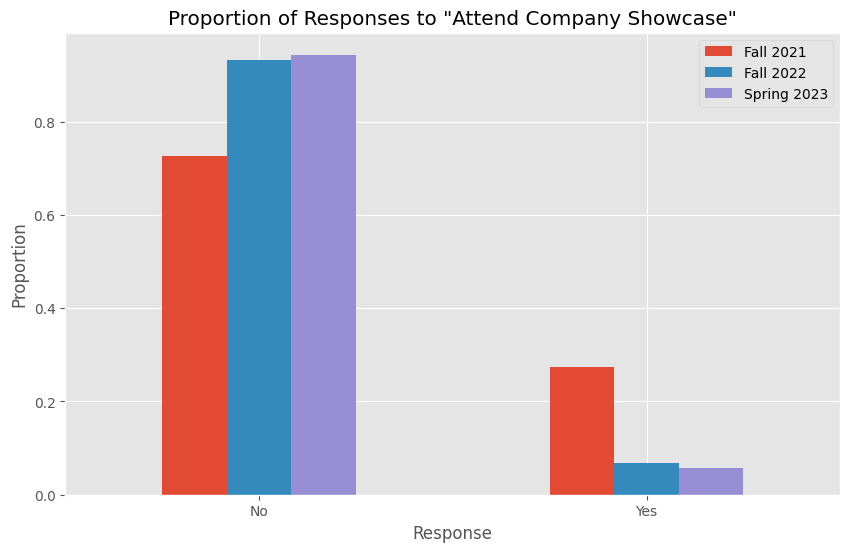

In [34]:
prop_fall_21 = student_fall_21['attend_company_showcase'].value_counts(normalize=True)
prop_fall_22 = student_fall_22['attend_company_showcase'].value_counts(normalize=True)
prop_spring_23 = student_spring_23['attend_company_showcase'].value_counts(normalize=True)

prop_df = pd.DataFrame({
    'Fall 2021': prop_fall_21,
    'Fall 2022': prop_fall_22,
    'Spring 2023': prop_spring_23
})


prop_df.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Responses to "Attend Company Showcase"')
plt.ylabel('Proportion')
plt.xlabel('Response')
plt.xticks(rotation=0)
plt.show()

In [35]:
student_fall_22.columns

Index(['id', 'attend_in_person_fair', 'companies_researched_before_fair',
       'overall_rating', 'feedback_what_worked', 'feedback_what_did_not_work',
       'feedback_improve_fair', 'attend_virtual_fair',
       'rate_virtual_career_fair', 'favorite_features_virtual_app',
       'issues_virtual_career_app', 'future_features_career_app',
       'attend_company_showcase', 'rate_company_showcase',
       'rate_company_showcase_accessability', 'rate_company_showcase_use',
       'rate_company_diversity', 'feedback_company_showcase',
       'attend_welcome_social', 'rate_welcome_social',
       'rate_welcome_social_accessibility',
       'rate_welcome_social_company_diversity',
       'impact_welcome_social_on_fair', 'feedback_welcome_social',
       'rate_ability_to_communicate_info', 'where_found_info',
       'use_any_website_resources', 'feedback_communication',
       'rate_whether_info_sent_timely', 'rate_documentation', 'Year',
       'feedback_what_worked_sentiment_fall_2022',
  

In [36]:
student_fall_22['attend_company_showcase'].iloc[131]
student_fall_22.at[131, 'attend_company_showcase'] = 'Yes'

In [37]:
student_fall_22['attend_company_showcase'].iloc[131]

'Yes'

In [38]:
print(student_fall_21['major'].value_counts()) 
print()


major
Mechanical Engineering                                 31
Civil & Environmental Engineering                      17
Electrical Engineering                                 14
Computer Science                                       12
Chemical Engineering                                   11
Industrial & Systems Engineering                       10
Aerospace Engineering                                   8
Computer Engineering                                    7
Other                                                   6
Materials Science and Engineering                       5
Petroleum Engineering                                   4
Architectural Engineering                               3
Electronic Systems Engineering Technology               2
Biological & Agricultural Engineering                   2
Manufacturing and Mechanical Engineering Technology     2
Interdisciplinary Engineering                           1
Biomedical Engineering                                  1
Name: co

In [39]:
sns.barplot(data = student_fall_21, x = 'major')

TypeError: Horizontal orientation requires numeric `x` variable.